In [ ]:
# This code is for our Plot2's recreation
# Based on 3 equations we had

### Explanation of the Code: Sudo-Code

#### 1. Define Parameters
- A `Parameters` class is created to store constants and biological rates:
  - **Mutation Rates**:
    - $r_{APC}$, $r_{TP53}$, $r_{KRAS}$, $r_{LOH}$.
  - **Initial Crypt Count**:
    - $N_{\text{crypts}}$ (starting number of crypts in the tissue).
  - **Growth Rates**:
    - $b_{APC}$, $b_{KRAS}$, $b_{BOTH}$ (growth advantages for different states).

#### 2. Define Mathematical Equations
- Three functions compute malignancy probabilities over time $t$:
  1. **Equation 1 (All drivers neutral)**:
     - Formula: $P(t) = N \cdot r_{APC} \cdot r_{TP53} \cdot r_{KRAS} \cdot r_{LOH}^2 \cdot \frac{t^5}{4}$.
  2. **Equation 2 (APC advantage)**:
     - Formula: $P(t) = \frac{3}{2} \cdot \frac{N \cdot r_{APC} \cdot r_{TP53} \cdot r_{KRAS} \cdot r_{LOH}^2}{b_{APC}^3} \cdot t^2 \cdot e^{b_{APC} \cdot t}$.
  3. **Equation 3 (APC & KRAS advantage)**:
     - Formula includes a complex factor accounting for combined effects of $b_{APC}$, $b_{KRAS}$, and $b_{BOTH}$.

#### 3. Plotting Function
- A `plot_fig2` function is defined to create a semi-logarithmic plot:
  1. **Compute Probabilities**:
     - Call the three equation functions to compute probabilities over time.
  2. **Plot Results**:
     - Use a semi-logarithmic plot to visualize time $t$ vs. malignancy probabilities.
  3. **Customize Axes**:
     - $x$-axis: 20 to 80 years, labeled every 10 years.
     - $y$-axis: $10^{-12}$ to $10^{-2}$, labeled at $10^{-11}$, $10^{-8}$, $10^{-5}$, $10^{-2}$.
  4. **Add Gridlines**:
     - Include major and minor gridlines for better readability.
  5. **Save as PDF**:
     - Save the plot to `Colorectal_Cancer_Development.pdf`.

#### 4. Main Function
- Initialize the `Parameters` class to define constants.
- Generate a time range from 20 to 80 years with 1000 points.
- Call the `plot_fig2` function to create the plot and save it as a PDF.

### Workflow Summary
1. **Initialize parameters**:
   - Biological rates and crypt counts are defined in the `Parameters` class.
2. **Mathematical modeling**:
   - Compute malignancy probabilities using three different equations.
3. **Visualization**:
   - Plot the results on a semi-logarithmic scale.
4. **Output**:
   - Save the visualization as a PDF for reporting or analysis.



In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
class Parameters:
    def __init__(self):
        self.u = 1.25e-8  # Mutation rate per base pair per year
        self.n_APC = 604
        self.n_TP53 = 73
        self.n_KRAS = 20
        self.r_APC = self.n_APC * self.u
        self.r_TP53 = self.n_TP53 * self.u
        self.r_KRAS = self.n_KRAS * self.u
        self.r_LOH = 1.36e-4
        self.N_crypts = 1e8
        self.b_APC = 0.2
        self.b_KRAS = 0.07
        self.b_BOTH = self.b_APC + self.b_KRAS

In [3]:
# Functions for the equations
def eq1(params, t):
    return params.N_crypts * params.r_APC * params.r_TP53 * params.r_KRAS * params.r_LOH**2 * (t**5 / 4)

def eq2(params, t):
    b1 = params.b_APC
    return (3/2) * (params.N_crypts * params.r_APC * params.r_TP53 * params.r_KRAS * params.r_LOH**2 / b1**3) * t**2 * np.exp(b1 * t)

def eq3(params, t):
    b1 = params.b_APC
    b2 = params.b_KRAS
    b12 = params.b_BOTH
    factor = (1 / (b12**3 * (b12 - b1))) + (1 / (b12**3 * (b12 - b2))) + (1 / (b12**2 * (b12 - b2)**2))
    return params.N_crypts * params.r_APC * params.r_TP53 * params.r_KRAS * params.r_LOH**2 * factor * t * np.exp(b12 * t)

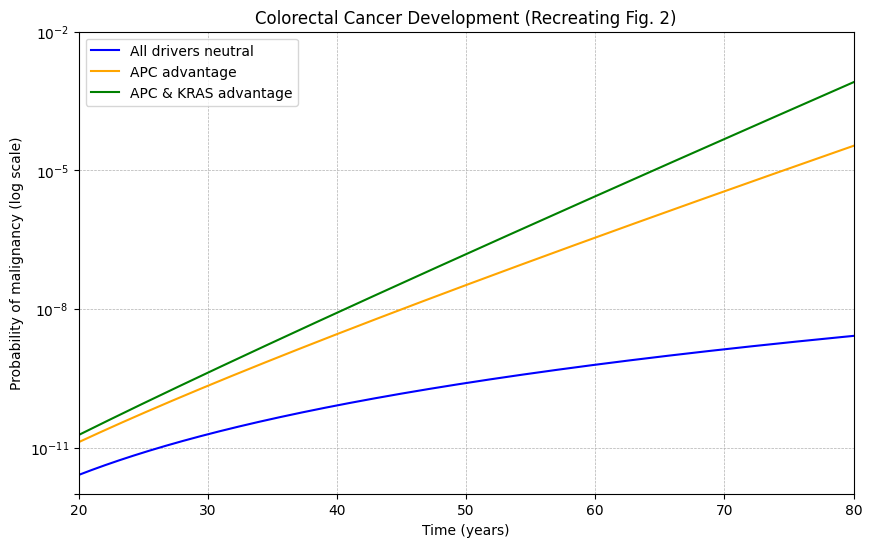

In [4]:
# Plotting with customized y-axis scale
def plot_fig2(params, t_range):
    P1 = eq1(params, t_range)
    P2 = eq2(params, t_range)
    P3 = eq3(params, t_range)

    plt.figure(figsize=(10, 6))
    plt.semilogy(t_range, P1, label="All drivers neutral", color="blue")
    plt.semilogy(t_range, P2, label="APC advantage", color="orange")
    plt.semilogy(t_range, P3, label="APC & KRAS advantage", color="green")

    # Set axis limits
    plt.xlim(20, 80)  # X-axis range
    plt.ylim(1e-12, 1e-2)  # Y-axis range

    # Define x-ticks and y-ticks
    plt.xticks([20, 30, 40, 50, 60, 70, 80])
    plt.yticks([1e-12, 1e-11, 1e-8, 1e-5, 1e-2], 
               [r"", r"$10^{-11}$", r"$10^{-8}$", r"$10^{-5}$", r"$10^{-2}$"])

    # Labels and grid
    plt.xlabel("Time (years)")
    plt.ylabel("Probability of malignancy (log scale)")
    plt.title("Colorectal Cancer Development (Recreating Fig. 2)")
    plt.grid(True, which="both", linestyle="--", linewidth=0.5)
    plt.legend()
    
    plt.savefig("[0]Colorectal_Cancer_Development_1130.pdf", format="pdf", bbox_inches="tight")

    plt.show()

if __name__ == "__main__":
    params = Parameters()
    t_range = np.linspace(20, 80, 1000)  # Time range in years, starting from 20
    plot_fig2(params, t_range)

Nov30: need tau-leaping simulation

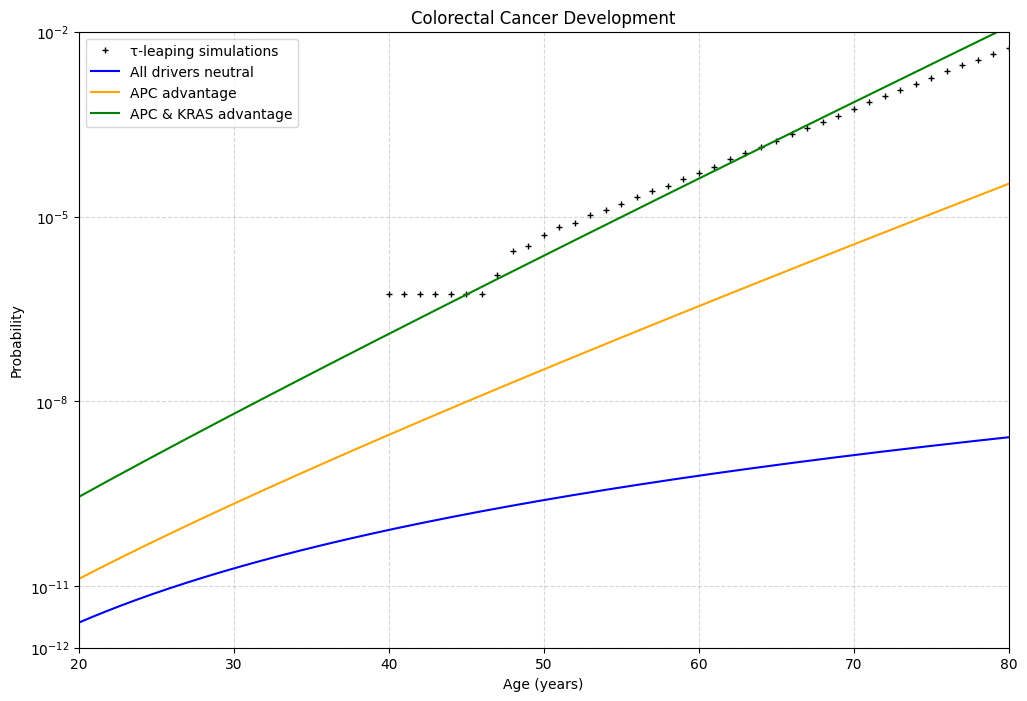

Data points: 81
Cancer probability at age 20: 0.00e+00
Cancer probability at age 50: 0.00e+00
Cancer probability at age 80: 5.39e-03


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Parameters class
class Parameters:
    def __init__(self):
        self.u = 1.25e-8  # Mutation rate per base pair per year
        self.n_APC = 604
        self.n_TP53 = 73
        self.n_KRAS = 20
        self.r_APC = self.n_APC * self.u
        self.r_TP53 = self.n_TP53 * self.u
        self.r_KRAS = self.n_KRAS * self.u
        self.r_LOH = 1.36e-4
        self.N_crypts = 1e8
        self.b_APC = 0.2
        self.b_KRAS = 0.07
        self.b_BOTH = self.b_APC + self.b_KRAS

# Functions for the equations
def eq1(params, t):
    return params.N_crypts * params.r_APC * params.r_TP53 * params.r_KRAS * params.r_LOH**2 * (t**5 / 4)

def eq2(params, t):
    b1 = params.b_APC
    return (3/2) * (params.N_crypts * params.r_APC * params.r_TP53 * params.r_KRAS * params.r_LOH**2 / b1**3) * t**2 * np.exp(b1 * t)


# CYR: 在原paper中的c怎么取？c会改变绿色的线很多。
def eq3(params, t):
    b1 = params.b_APC
    b2 = params.b_KRAS
    b12 = params.b_BOTH
    factor = (1 / (b12**3 * (b12 - b1))) + (1 / (b12**3 * (b12 - b2))) + (1 / (b12**2 * (b12 - b2)**2))
    return 15*params.N_crypts * params.r_APC * params.r_TP53 * params.r_KRAS * params.r_LOH**2 * factor * t * np.exp(b12 * t)

# Read data from CSV
df = pd.read_csv('output.csv', header=None)
years = df[0]
state_331 = df[38]  # (3,3,1) state
state_341 = df[40]  # (3,4,1) state
state_431 = df[48]  # (4,3,1) state
state_441 = df[50]  # (4,4,1) state

# Total cancer probability
cancer_prob = state_331 + state_341 + state_431 + state_441

# Plotting
def plot_combined(params, t_range, years, cancer_prob):
    P1 = eq1(params, t_range)
    P2 = eq2(params, t_range)
    P3 = eq3(params, t_range)

    plt.figure(figsize=(12, 8))

    # Plot τ-leaping simulation data
    plt.semilogy(years, cancer_prob, '+', color='black', label='τ-leaping simulations', markersize=4)

    # Plot theoretical curves
    plt.semilogy(t_range, P1, label="All drivers neutral", color="blue")
    plt.semilogy(t_range, P2, label="APC advantage", color="orange")
    plt.semilogy(t_range, P3, label="APC & KRAS advantage", color="green")

    # Customize axes
    plt.xlim(20, 80)
    plt.ylim(1e-12, 1e-2)
    plt.xticks([20, 30, 40, 50, 60, 70, 80])
    plt.yticks([1e-12, 1e-11, 1e-8, 1e-5, 1e-2], 
               [r"$10^{-12}$", r"$10^{-11}$", r"$10^{-8}$", r"$10^{-5}$", r"$10^{-2}$"])

    # Labels and title
    plt.xlabel("Age (years)")
    plt.ylabel("Probability")
    plt.title("Colorectal Cancer Development")

    # Grid and legend
    plt.grid(True, which="both", linestyle="--", alpha=0.5)
    plt.legend()
    
    # Save the figure
    plt.savefig("Colorectal_Cancer_Development.pdf", format="pdf", bbox_inches="tight")
    plt.show()

    # Print statistical information
    print(f"Data points: {len(years)}")
    print(f"Cancer probability at age 20: {cancer_prob.iloc[0]:.2e}")
    print(f"Cancer probability at age 50: {cancer_prob.iloc[30]:.2e}")
    print(f"Cancer probability at age 80: {cancer_prob.iloc[-1]:.2e}")

if __name__ == "__main__":
    params = Parameters()
    t_range = np.linspace(20, 80, 1000)  # Time range
    plot_combined(params, t_range, years, cancer_prob)
